<a href="https://colab.research.google.com/github/purshottamkumarr/Deep-Learning-learning-project/blob/main/Copy_of_Fashion_Mnist_Model_Training1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Set the Seeds for responsibility

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


importing the Dependiences

In [ ]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

Curation

In [ ]:
fashion_mnist = datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [ ]:
print(len(train_images))

60000


In [ ]:
print(len(train_labels))

60000


In [ ]:
print(train_images[0].shape)

(28, 28)


In [ ]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

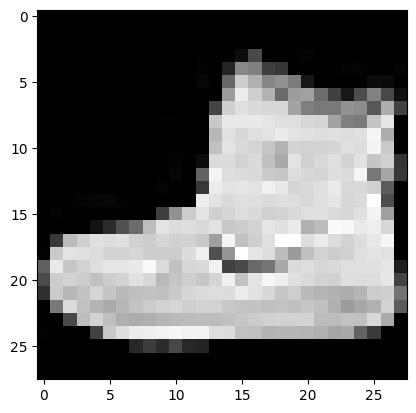

In [ ]:
## Display An Images From Databases

plt.imshow(train_images[0],cmap = "gray")
plt.show()

In [ ]:
print(train_labels[0])

9


In [ ]:
# Normalize the Images Pixel values

train_images,train_labels = train_images/255.0,train_labels /255.0

In [ ]:
## reshape The Images to Specify

train_image = train_images.reshape((train_images.shape[0],28,28,1))
test_images = test_images.reshape((test_images.shape[0],28,28,1))

In [ ]:
# Building the Convulational Neural Network

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation = "relu",input_shape= (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation = "relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation = "relu"))


# Add Dense Layers on Top

model.add(layers.Flatten())
model.add(layers.Dense(64,activation ="relu"))
model.add(layers.Dense(10))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## complie the Train the model

model.compile(optimizer = "adam",
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ["accuracy"])


Model Training

In [ ]:
history = model.fit(train_images,train_labels,epochs = 5,
                    validation_data = (test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1012 - loss: 0.0318 - val_accuracy: 0.1000 - val_loss: 16821.1074
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1013 - loss: 0.0000e+00 - val_accuracy: 0.1000 - val_loss: 16821.1094
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1013 - loss: 0.0000e+00 - val_accuracy: 0.1000 - val_loss: 16821.1113
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1013 - loss: 0.0000e+00 - val_accuracy: 0.1000 - val_loss: 16821.1094
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1013 - loss: 0.0000e+00 - val_accuracy: 0.1000 - val_loss: 16821.1074


Model Evaluation

In [ ]:
## Evaluate the Model

test_loss,test_acc = model.evaluate(test_images,test_labels,verbose = 2)
print("\n Test accuarcy:",test_acc )

313/313 - 0s - 1ms/step - accuracy: 0.1000 - loss: 16821.1074

 Test accuarcy: 0.10000000149011612


Plot the training

<function matplotlib.pyplot.show(close=None, block=None)>

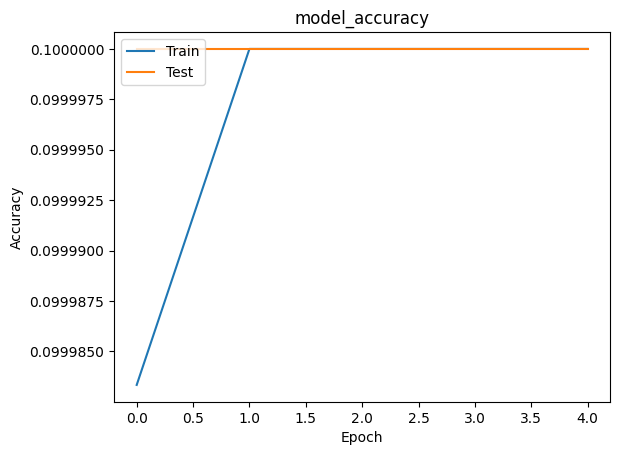

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Test"],loc = "upper left")
plt.show


In [ ]:
model.save("trained_fashion_mnist_model.h5")

In [ ]:
import streamlit as st

ModuleNotFoundError: No module named 'streamlit'